
<br>
<br>

# `# Kernal Trick:`

<br>
<br>
 

In [8]:

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as px

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


In [4]:
from sklearn.datasets import make_circles

X,y = make_circles(n_samples=100,factor=.1,noise=.2)
X[:5,:]

array([[ 0.8127864 ,  0.80333001],
       [-0.42907607,  0.82702094],
       [-0.05039956,  0.24827769],
       [-0.43551244, -0.72902748],
       [-0.21380122,  0.29012351]])

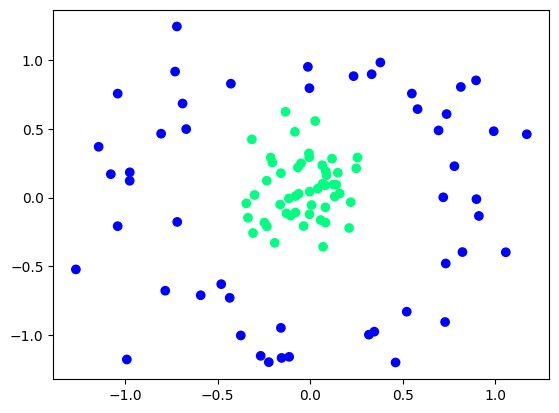

In [5]:
plt.scatter(x=X[:,0],y=X[:,1],c=y,cmap="winter")

In [6]:

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
print(X_train.shape)
print(X_test.shape)


(80, 2)
(20, 2)


In [7]:

classifer = SVC(kernel="linear")
classifer.fit(X=X_train,y=y_train.ravel())


SVC(kernel='linear')

In [10]:

y_pred = classifer.predict(X_test)
accuracy_score(y_test,y_pred)


0.65

<Axes: >

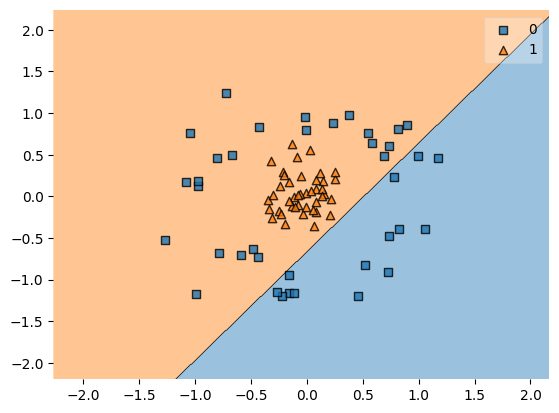

In [11]:

from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train,y_train,clf=classifer)


<br>
<br>

#  `# Let's apply radial basis function: `

<br>
<br>

In [20]:

import plotly.express as px

def ThreeD_plot_radial_basis_fn():
    r = np.exp(-(X**2).sum(1))
    return px.scatter_3d(x=X[:,0],
                         y=X[:,1],
                         z=r,
                         color=y,
                         color_continuous_scale='RdBu',
                         labels={'X':'X_AXIS','Y':'Y_AXIS','Z':'Z_AXIS'})

ThreeD_plot_radial_basis_fn()


<Axes3D: >

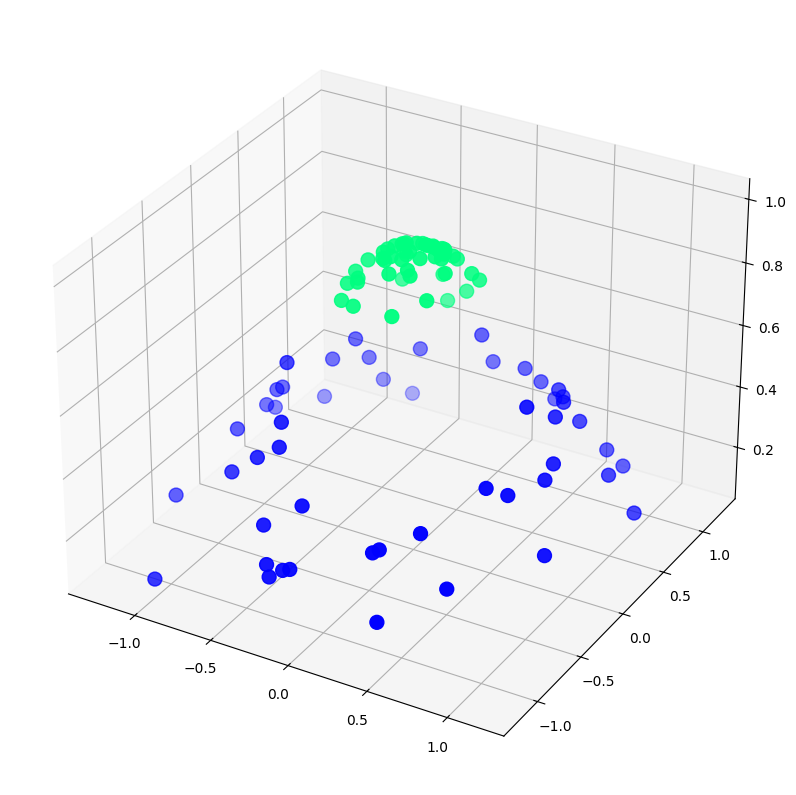

In [28]:

# with matplotlib:
fig = plt.figure(figsize=(10,15))
ax = fig.add_subplot(projection='3d')


def ThreeD_plot_radial_basis_fn():
    r = np.exp(-(X**2).sum(1))
    ax.scatter3D(X[:,0],X[:,1],r,c=y,cmap='winter',s=100)
    return ax

ThreeD_plot_radial_basis_fn()



`উপরে আমরা, একটা function apply করে,  মাঝখানের data গুলোকে একটা extra dimention add করে উপরে নিয়ে আসতে পেরেছি । এখন, easily আমরা একটা  hyperplane draw করে  classification করতে পারবো । এই ধরনের function কে আমরা radial basis fucntion বলতেছি ।  Kernal change করার মাধ্যমে আমরা এই ধরনের radial basis function apply করি আমাদের data র উপর ।`


#### BUT,

`**এটা শুধু আমরা বুঝার জন্য exta একটা column বানিয়ে visulize  করলাম । যেইটা internally kernal handel করে আর এর math তা একটু complex ।**`


In [41]:


cls = SVC(kernel="rbf")
cls.fit(X_train,y_train)


SVC()

In [42]:

accuracy_score(y_test,cls.predict(X_test))

1.0

<Axes: >

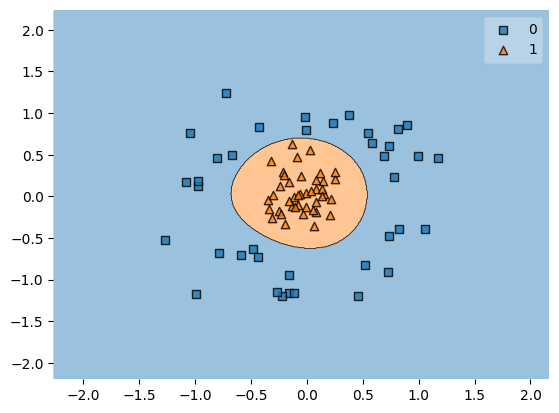

In [43]:
plot_decision_regions(X_train,y_train,cls)